In [1]:
!pip install imdbpy

In [2]:
from imdb import IMDb

# create an instance of the IMDb class
ia = IMDb()

# get a movie
movie = ia.get_movie('0386676')

# print the names of the directors of the movie
#print('Directors:')
#for director in movie['directors']:
#    print(director['name'])

# print the genres of the movie
print('Genres:')
for genre in movie['genres']:
    print(genre)

# search for a person name
people = ia.search_person('Ashton Kutcher')
for person in people:
   print(person.personID, person['name'])

Genres:
Comedy
0005110 Ashton Kutcher
8179452 Ashton Butcher
9107873 Kate Ashton Butcher


In [3]:
from imdb import IMDb

# create an instance of the IMDb class
ia = IMDb()

# get a movie and print its director(s)
the_matrix = ia.get_movie('0133093')
for director in the_matrix['directors']:
    print(director['name'])

# show all information that are currently available for a movie
print(sorted(the_matrix.keys()))

# show all information sets that can be fetched for a movie
print(ia.get_movie_infoset())

# update a Movie object with more information
ia.update(the_matrix, ['technical'])
# show which keys were added by the information set
print(the_matrix.infoset2keys['technical'])
# print one of the new keys
print(the_matrix.get('tech'))


Lana Wachowski
Lilly Wachowski
['akas', 'animation department', 'art department', 'art directors', 'aspect ratio', 'assistant directors', 'box office', 'camera department', 'canonical title', 'cast', 'casting department', 'casting directors', 'certificates', 'cinematographers', 'color info', 'composers', 'costume departmen', 'costume designers', 'countries', 'country codes', 'cover url', 'director', 'directors', 'distributors', 'editorial department', 'editors', 'full-size cover url', 'genres', 'imdbID', 'kind', 'language codes', 'languages', 'location management', 'long imdb canonical title', 'long imdb title', 'make up department', 'miscellaneous', 'music department', 'original air date', 'original title', 'other companies', 'plot', 'plot outline', 'producers', 'production companies', 'production designers', 'production managers', 'rating', 'runtimes', 'script department', 'set decorators', 'smart canonical title', 'smart long imdb canonical title', 'sound department', 'sound mix', '

In [4]:

# importing the module 
import imdb 
  
# creating instance of IMDb 
ia = imdb.IMDb() 
  
# id 
code = "0386676"
  
# getting information 
series = ia.get_movie(code) 
  
# getting gerne of the series 
genre = series.data['genres'] 
  
# printing the object i.e name 
print(series) 
  
# print the gerne 
print(genre) 

The Office
['Comedy']


In [5]:
#ANALYSIS OF THAT 70'S SHOW DATA

In [6]:
from requests import get
url = 'https://www.imdb.com/title/tt0165598/episodes?season=1'
response = get(url)
print(response.text[:250])


 









<!DOCTYPE html>
<html
    xmlns:og="http://ogp.me/ns#"
    xmlns:fb="http://www.facebook.com/2008/fbml">
    <head>
         
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge">

    <meta name="ap


In [7]:
from bs4 import BeautifulSoup
html_soup = BeautifulSoup(response.text, 'html.parser')
type(html_soup)

bs4.BeautifulSoup

In [8]:
episode_containers = html_soup.find_all('div', class_='info')

In [9]:
episode_containers

[<div class="info" itemprop="episodes" itemscope="" itemtype="http://schema.org/TVEpisode">
 <meta content="1" itemprop="episodeNumber"/>
 <div class="airdate">
             23 Aug. 1998
     </div>
 <strong><a href="/title/tt0720143/" itemprop="name" title="That '70s Pilot">That '70s Pilot</a></strong>
 <div class="ipl-rating-widget">
 <div class="ipl-rating-star small">
 <span class="ipl-rating-star__star">
 <svg class="ipl-icon ipl-star-icon" fill="#000000" height="24" viewbox="0 0 24 24" width="24" xmlns="http://www.w3.org/2000/svg">
 <path d="M0 0h24v24H0z" fill="none"></path>
 <path d="M12 17.27L18.18 21l-1.64-7.03L22 9.24l-7.19-.61L12 2 9.19 8.63 2 9.24l5.46 4.73L5.82 21z"></path>
 <path d="M0 0h24v24H0z" fill="none"></path>
 </svg>
 </span>
 <span class="ipl-rating-star__rating">8.1</span>
 <span class="ipl-rating-star__total-votes">(1,512)</span>
 </div>
 <div class="ipl-rating-interactive small ipl-rating-interactive--no-rating">
 <input class="ipl-rating-interactive__state" 

In [10]:
episode_containers[0].a['title']

"That '70s Pilot"

In [11]:
 episode_containers[0].meta['content']

'1'

In [12]:
episode_containers[0].find('div', class_='airdate').text.strip()

'23 Aug. 1998'

In [13]:
episode_containers[0].find('div', class_='ipl-rating-star__rating')

In [14]:
episode_containers[0].find('span', class_='ipl-rating-star__total-votes').text

'(1,512)'

In [15]:
episode_containers[0].find('div', class_='item_description').text.strip()

"Point Place, Wisconsin, May 17, 1976. Nerdy teenager Eric, who smokes weed with some classmates in the basement, is in heaven when his dad Red decides to hand him the keys of his flashy Vista Cruiser, at the price of extra chores and forbidding him to take it out of town, knowing that won't be obeyed anyway. The gang, which just adopted foreign exchange student Fez, is excited about a Todd Rundgren concert- Jackie uses her female charms to make sure skirt-chaser Michael Kelso would take her too."

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [65]:
# Initializing the series that the loop will populate
community_episodes = []

# For every season in the series-- range depends on the show
for sn in range(1,9):
    # Request from the server the content of the web page by using get(), and store the server’s response in the variable response
    response = get('https://www.imdb.com/title/tt0386676/episodes?season=' + str(sn))

    # Parse the content of the request with BeautifulSoup
    page_html = BeautifulSoup(response.text, 'html.parser')

    # Select all the episode containers from the season's page
    episode_containers = page_html.find_all('div', class_ = 'info')

    # For each episode in each season
    for episodes in episode_containers:
            # Get the info of each episode on the page
            season = sn
            episode_number = episodes.meta['content']
            title = episodes.a['title']
            airdate = episodes.find('div', class_='airdate').text.strip()
            rating = episodes.find('span', class_='ipl-rating-star__rating').text
            total_votes = episodes.find('span', class_='ipl-rating-star__total-votes').text
            desc = episodes.find('div', class_='item_description').text.strip()
           
            # Compiling the episode info
            episode_data = [season, episode_number, title, airdate, rating, total_votes, desc]

            # Append the episode info to the complete dataset
            community_episodes.append(episode_data)

In [66]:
import pandas as pd 
community_episodes = pd.DataFrame(community_episodes, columns = ['season', 'episode_number', 'title', 'airdate', 'rating', 'total_votes', 'desc'])

community_episodes.head()

,season,episode_number,title,airdate,rating,total_votes,desc
0,1,1,Pilot,24 Mar. 2005,7.5,"(5,445)",The premiere episode introduces the boss and s...
1,1,2,Diversity Day,29 Mar. 2005,8.3,"(5,318)",Michael's off color remark puts a sensitivity ...
2,1,3,Health Care,5 Apr. 2005,7.8,"(4,458)",Michael leaves Dwight in charge of picking the...
3,1,4,The Alliance,12 Apr. 2005,8.0,"(4,339)","Just for a laugh, Jim agrees to an alliance wi..."
4,1,5,Basketball,19 Apr. 2005,8.4,"(4,763)",Michael and his staff challenge the warehouse ...


In [67]:
def remove_str(votes):
    for r in ((',',''), ('(',''),(')','')):
        votes = votes.replace(*r)
        
    return votes

In [68]:
community_episodes['total_votes'] = community_episodes.total_votes.apply(remove_str).astype(int)

community_episodes

,season,episode_number,title,airdate,rating,total_votes,desc
0,1,1,Pilot,24 Mar. 2005,7.5,5445,The premiere episode introduces the boss and s...
1,1,2,Diversity Day,29 Mar. 2005,8.3,5318,Michael's off color remark puts a sensitivity ...
2,1,3,Health Care,5 Apr. 2005,7.8,4458,Michael leaves Dwight in charge of picking the...
3,1,4,The Alliance,12 Apr. 2005,8.0,4339,"Just for a laugh, Jim agrees to an alliance wi..."
4,1,5,Basketball,19 Apr. 2005,8.4,4763,Michael and his staff challenge the warehouse ...
...,...,...,...,...,...,...,...
160,8,20,Welcome Party,12 Apr. 2012,7.0,2212,Andy tries to break up with his girlfriend aft...
161,8,21,Angry Andy,19 Apr. 2012,7.0,2376,"Andy and Erin return to Dunder Mifflin, only t..."
162,8,22,Fundraiser,26 Apr. 2012,7.0,2141,Andy confronts Robert for the first time after...
163,8,23,Turf War,3 May 2012,7.6,2063,Dwight and Jim fight with the Syracuse over a ...


In [69]:
community_episodes['rating'] = community_episodes.rating.astype(float)

In [70]:
community_episodes['airdate'] = pd.to_datetime(community_episodes.airdate)
community_episodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   season          165 non-null    int64         
 1   episode_number  165 non-null    object        
 2   title           165 non-null    object        
 3   airdate         165 non-null    datetime64[ns]
 4   rating          165 non-null    float64       
 5   total_votes     165 non-null    int32         
 6   desc            165 non-null    object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(3)
memory usage: 8.5+ KB


In [71]:
community_episodes.head()

,season,episode_number,title,airdate,rating,total_votes,desc
0,1,1,Pilot,2005-03-24,7.5,5445,The premiere episode introduces the boss and s...
1,1,2,Diversity Day,2005-03-29,8.3,5318,Michael's off color remark puts a sensitivity ...
2,1,3,Health Care,2005-04-05,7.8,4458,Michael leaves Dwight in charge of picking the...
3,1,4,The Alliance,2005-04-12,8.0,4339,"Just for a laugh, Jim agrees to an alliance wi..."
4,1,5,Basketball,2005-04-19,8.4,4763,Michael and his staff challenge the warehouse ...


In [72]:
community_episodes.to_csv('Community_Episodes_IMDb_Ratings.csv',index=False)

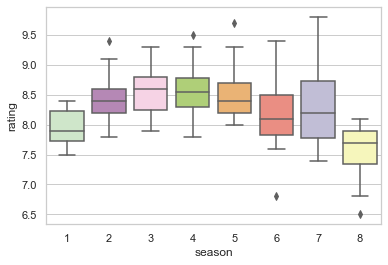

In [73]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.boxplot(x="season", y="rating", data=community_episodes, palette="Set3_r")

In [74]:
num_data = community_episodes[["season", "episode_number", "rating", "total_votes"]]
num_data.head()

,season,episode_number,rating,total_votes
0,1,1,7.5,5445
1,1,2,8.3,5318
2,1,3,7.8,4458
3,1,4,8.0,4339
4,1,5,8.4,4763


In [75]:
df = pd.read_csv('Community_Episodes_IMDb_Ratings.csv', 
                 usecols=[3,4], names=['airdate', 'rating'], 
                 skiprows=1, index_col=0, parse_dates=[0])

In [76]:
df.head()

,rating
airdate,
2005-03-24,7.5
2005-03-29,8.3
2005-04-05,7.8
2005-04-12,8.0
2005-04-19,8.4


In [77]:
df['rating'] = pd.to_numeric(df.rating, errors='coerce')
df.dropna(inplace=True)

In [78]:
df_m = df.copy()
df_m['month'] = [i.month for i in df_m.index]
df_m['year'] = [i.year for i in df_m.index]
# group by month and year, get the average
df_m = df_m.groupby(['month', 'year']).mean()

In [79]:
df_m.head()

rating
month year          
1     2006  8.450000
      2007  8.666667
      2009  8.350000
      2010  6.800000
      2011  7.950000

In [80]:
df_m = df_m.unstack(level=0)

In [81]:
df_m.fillna(df_m.mean(), inplace=True)

In [82]:
df_m.head()

rating                                                       \
month        1      2         3         4         5     9         10   
year                                                                   
2005   8.027778  8.225  7.900000  7.975000  8.495238  8.45  8.300000   
2006   8.450000  8.200  8.300000  8.400000  9.050000  8.60  8.200000   
2007   8.666667  8.425  8.249444  8.833333  9.100000  8.80  8.550000   
2008   8.027778  8.225  8.249444  8.700000  8.466667  8.80  8.100000   
2009   8.350000  8.700  8.350000  8.660000  8.900000  8.45  8.533333   

                           
month        11        12  
year                       
2005   8.325000  8.900000  
2006   8.375000  8.800000  
2007   8.466667  8.516667  
2008   8.433333  8.600000  
2009   8.333333  8.400000

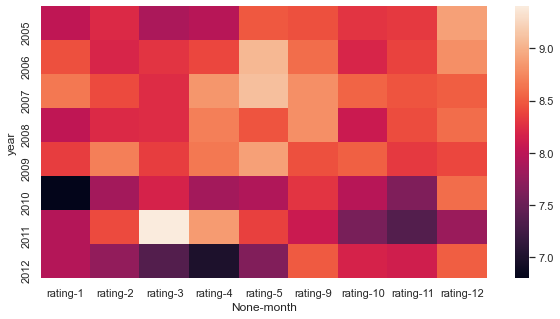

In [97]:
fig, ax = plt.subplots(figsize=(10,5))
sb.heatmap(df_m)
plt.show()

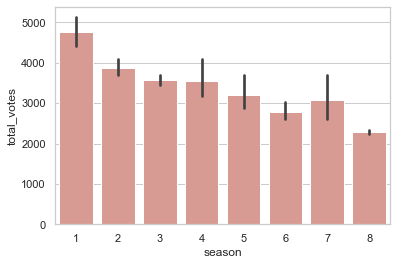

In [84]:
ax = sns.barplot(x="season", y="total_votes", data=num_data,
                 color="salmon", saturation=.5)

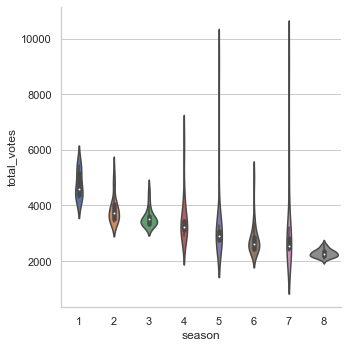

In [85]:
sns.catplot(data=num_data, kind="violin", x="season", y="total_votes", split=True)

In [38]:
#ANALYSIS ON THE OFFICE TV SHOW 

In [61]:
# Initializing the series that the loop will populate
community_episodes_o = []

# For every season in the series-- range depends on the show
for sn in range(1,9):
    # Request from the server the content of the web page by using get(), and store the server’s response in the variable response
    response_o = get('https://www.imdb.com/title/tt0386676/episodes?season=' + str(sn))

    # Parse the content of the request with BeautifulSoup
    page_html = BeautifulSoup(response_o.text, 'html.parser')

    # Select all the episode containers from the season's page
    episode_containers = page_html.find_all('div', class_ = 'info')

    # For each episode in each season
    for episodes in episode_containers:
            # Get the info of each episode on the page
            season = sn
            episode_number = episodes.meta['content']
            title = episodes.a['title']
            airdate = episodes.find('div', class_='airdate').text.strip()
            rating = episodes.find('span', class_='ipl-rating-star__rating').text
            total_votes = episodes.find('span', class_='ipl-rating-star__total-votes').text
            desc = episodes.find('div', class_='item_description').text.strip()
            # Compiling the episode info
            episode_data_o = [season, episode_number, title, airdate, rating, total_votes, desc]

            # Append the episode info to the complete dataset
            community_episodes_o.append(episode_data_o)

In [62]:
import pandas as pd 
community_episodes_o = pd.DataFrame(community_episodes, columns = ['season', 'episode_number', 'title', 'airdate', 'rating', 'total_votes', 'desc'])
community_episodes_o.head()

,season,episode_number,title,airdate,rating,total_votes,desc
0,1,1,That '70s Pilot,1998-08-23,8.1,1512,"Point Place, Wisconsin, May 17, 1976. Nerdy te..."
1,1,2,Eric's Birthday,1998-08-30,8.1,1222,Eric is turning 17 and made very clear he want...
2,1,3,Streaking,1998-09-06,7.8,1145,Point Place is buzzing when it's announced tha...
3,1,4,Battle of the Sexists,1998-09-20,7.7,1085,"Donna keeps beating Eric at games, which isn't..."
4,1,5,Eric's Burger Job,1998-09-27,7.7,1063,Eric gets a job at Fatso Burger and can't spen...


In [41]:
def remove_str(votes):
    for r in ((',',''), ('(',''),(')','')):
        votes = votes.replace(*r)
        
    return votes

In [42]:
#community_episodes_o['total_votes'] = community_episodes_o.total_votes.apply(remove_str).astype(int)
#community_episodes_o.head()

In [43]:
community_episodes_o.to_csv('Community_Episodes_IMDb_Ratings_theoffice.csv',index=False)

In [44]:
community_episodes_o['rating'] = community_episodes.rating.astype(float)

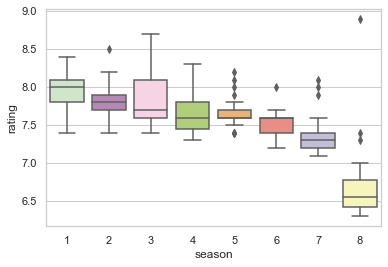

In [45]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.boxplot(x="season", y="rating", data=community_episodes_o, palette="Set3_r")

In [46]:
df1 = pd.read_csv('Community_Episodes_IMDb_Ratings_theoffice.csv', 
                 usecols=[3,4], names=['airdate', 'rating'], 
                 skiprows=1, index_col=0, parse_dates=[0])

In [47]:
num_data_office = community_episodes_o[["season", "episode_number", "rating", "total_votes"]]
num_data_office.head()

,season,episode_number,rating,total_votes
0,1,1,8.1,1512
1,1,2,8.1,1222
2,1,3,7.8,1145
3,1,4,7.7,1085
4,1,5,7.7,1063


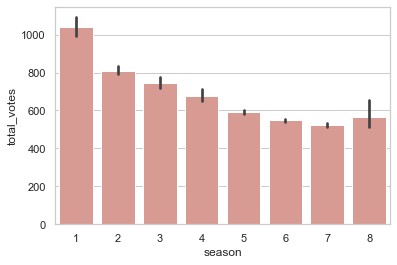

In [48]:
ax = sns.barplot(x="season", y="total_votes", data=num_data_office,
                 color="salmon", saturation=.5)

In [49]:
df1.head()

,rating
airdate,
1998-08-23,8.1
1998-08-30,8.1
1998-09-06,7.8
1998-09-20,7.7
1998-09-27,7.7


In [50]:
df_m = df1.copy()
df_m['month'] = [i.month for i in df_m.index]
df_m['year'] = [i.year for i in df_m.index]
# group by month and year, get the average
df_m = df_m.groupby(['month', 'year']).mean()

In [51]:
df_m.head()

rating
month year          
1     1999  7.800000
      2000  7.700000
      2001  7.975000
      2002  7.900000
      2003  7.666667

In [52]:
df_m = df_m.unstack(level=0)
df_m.fillna(df_m.mean(), inplace=True)
df_m.head()

rating                                                            \
month        1         2         3         4      5     6         7    8    
year                                                                        
1998   7.578125  7.519583  7.585208  7.358333  7.665  7.85  8.133333  8.1   
1999   7.800000  7.975000  8.150000  7.358333  7.665  7.85  8.133333  8.1   
2000   7.700000  7.880000  7.866667  7.400000  7.900  7.85  8.133333  8.1   
2001   7.975000  7.800000  7.650000  7.500000  7.760  7.85  8.133333  8.1   
2002   7.900000  7.560000  8.200000  7.733333  7.700  7.85  8.133333  8.1   

                                           
month        9         10        11    12  
year                                       
1998   7.733333  8.200000  7.850000  8.10  
1999   8.500000  7.800000  7.875000  7.70  
2000   7.816667  8.050000  7.866667  7.85  
2001   7.800000  7.666667  7.580000  7.45  
2002   7.700000  7.700000  7.566667  7.70

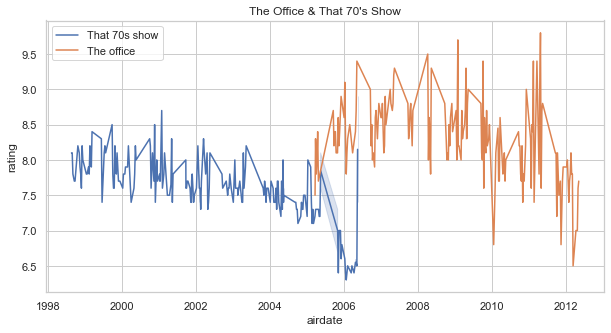

In [94]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data=community_episodes_o, x="airdate", y="rating")
sns.lineplot(data=community_episodes, x="airdate", y="rating")
#sns.lineplot(data=shows_year_df, x=’year’, y=’date_added’)
#ax.set_xticks(np.arange(1998,2006, 1))
plt.title("The Office & That 70's Show")
plt.legend(['That 70s show','The office'])
plt.ylabel("rating")
plt.xlabel("airdate")
plt.show()

In [54]:
community_episodes.describe()

,season,rating,total_votes
count,200.000000,200.00000,200.000000
mean,4.430000,7.59900,689.565000
std,2.262897,0.46039,187.494096
min,1.000000,6.30000,485.000000
25%,2.000000,7.40000,548.750000
50%,4.000000,7.60000,627.500000
75%,6.000000,7.82500,784.250000
max,8.000000,8.90000,1512.000000


In [55]:
community_episodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   season          200 non-null    int64         
 1   episode_number  200 non-null    object        
 2   title           200 non-null    object        
 3   airdate         200 non-null    datetime64[ns]
 4   rating          200 non-null    float64       
 5   total_votes     200 non-null    int32         
 6   desc            200 non-null    object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(3)
memory usage: 10.3+ KB


In [56]:
display(community_episodes.dtypes)

season                     int64
episode_number            object
title                     object
airdate           datetime64[ns]
rating                   float64
total_votes                int32
desc                      object
dtype: object

In [57]:
community_episodes['rating'] = community_episodes['rating'].astype(float)

In [58]:
display(community_episodes.dtypes)

season                     int64
episode_number            object
title                     object
airdate           datetime64[ns]
rating                   float64
total_votes                int32
desc                      object
dtype: object

In [91]:
ratings = dict(mean=community_episodes.rating.mean(),
              median=community_episodes.rating.median())
votes = dict(mean=community_episodes.total_votes.mean(),
              median=community_episodes.total_votes.median())

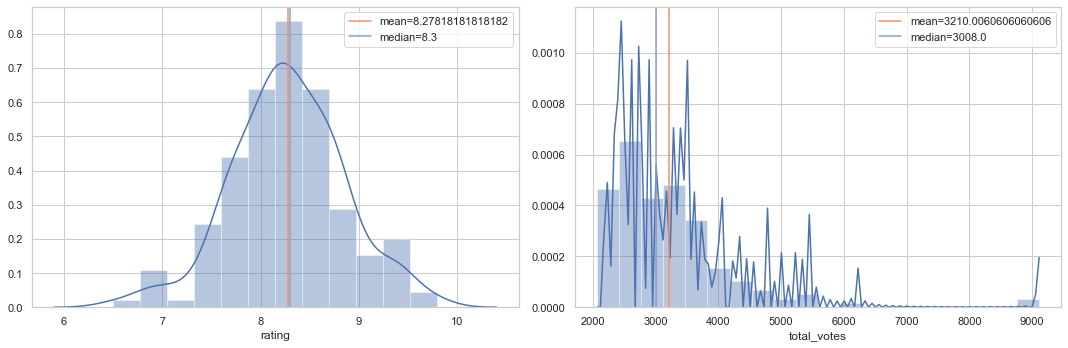

In [92]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
ax1 = sns.distplot(community_episodes.rating,kde_kws=dict(bw=0.2))
ax1.axvline(x=ratings["mean"],c=sns.color_palette("Set2")[1],label=f"mean={ratings['mean']}")
ax1.axvline(x=ratings["median"],c=sns.color_palette("Set2")[2],label=f"median={ratings['median']}")
plt.legend()
plt.subplot(1,2,2)
ax2 = sns.distplot(community_episodes.total_votes,kde_kws=dict(bw=0.2))
ax2.axvline(x=votes["mean"],c=sns.color_palette("Set2")[1],label=f"mean={votes['mean']}")
ax2.axvline(x=votes["median"],c=sns.color_palette("Set2")[2],label=f"median={votes['median']}")
plt.legend()
plt.tight_layout()
plt.show()